# OpenAI 어시스턴트(Assistant) API
- OpenAI 어시스턴트는 File Search, Code Interpreter등의 기능을 사용할 수 있는 API 기능
- 어시스턴트의 구성 요소
  - 어시스턴트(Assistant)  : LLM과 Tool이 결합된 객체
  - 스레드(Thread) : 메시지가 순차적으로 저장되는 공간(ChatGPT의 대화창과 유사)
  - 런(Run) : 어시스턴트와 스레드를 연결하여 작동시키는 객체
  - 런스텝(Runstep) : 런이 실행될 때마다, 메시지와 툴 사용을 구분하여 중간 결과를 저장
  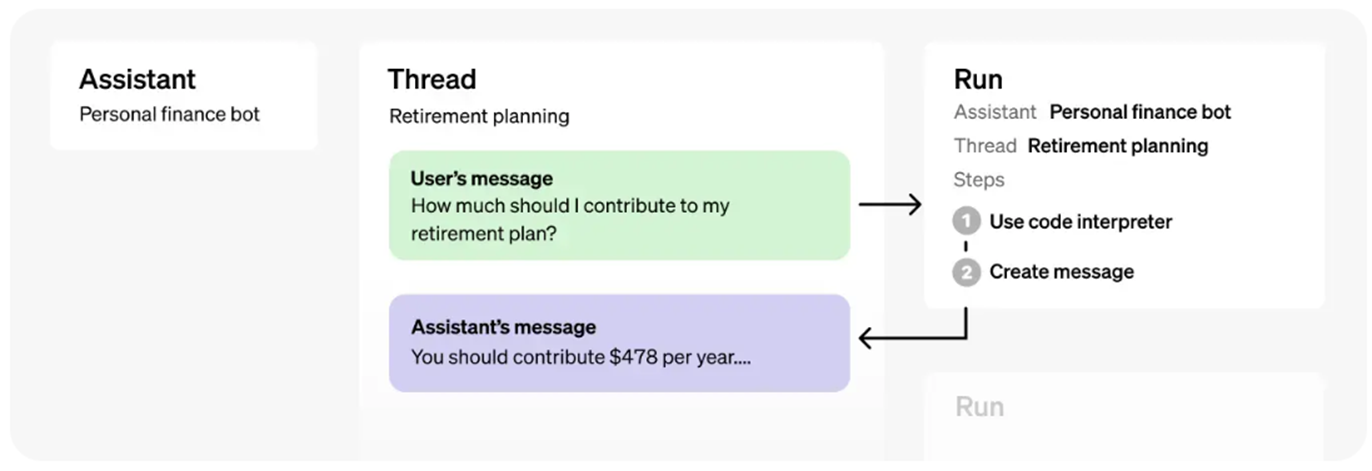

In [ ]:
# openai API 라이브러리 설치
!pip install openai tiktoken --upgrade

In [ ]:
# 라이브러리 로드
import openai
import os

# openai api key 설정
os.environ['OPENAI_API_KEY']  = ""
client = openai.OpenAI()

# API키 검증하기
try : client.models.lis(); print("OPENAI_API_KEY가 정상적으로 설정되어 있습니다.")
except: print(f"OPENAI_API_KEY가 유효하지 않습니다.")

## 어시스턴트 구성하기

- name : 어시스턴트의 이름
- instructions : 어시스턴트의 행동 지침을 결정
- tools : 어떤 기능을 활용할지 결정
  - code_interpreter : 질문에 답하기 위한 파이썬 코드를 작성하고 실행(데이터 파일 분석도 가능)
  - file_search : 문서를 읽고 활용
  - function_call : 사전에 정의된 함수를 매개변수로 받아 맥락에 맞는 함수를 실행

In [ ]:
# Code Interpreter를 이용해 수학 문제를 푸는 어시스턴트

math_assistant = client.beta.assistancs.create(
    name = "수학 선생님",
    instructions = "파이썬 코드를 사용해 주어진 문제를 해결하고, 풀이과정을 자세히 설명하세요.",
    tools = [{"type" : "code_interpreter"}],
    model = "gpt-4o",
    temperature=0.2
)

math_assistant

### 어시스턴트는 ID를 통해 다른 객체와 연결된다.

In [ ]:
math_assistant.id

## 스레드(Thread)와 런(Run) 만들기
- ChatGPT 페이지와 동일하게 하나의 스레드는 하나의 대화를 의미
- 스레드에 어시스턴트를 연결하여, 어시스턴트를 작동시킬 수 있다.

- 스레드에 메시지를 추가하여 원하는 형태의 대화를 수행할  수 있다.

In [ ]:
# create_thread : message 문자열을 받아 스레드 생성
def create_thread(message):
    thread = client.beta.threads.create(
        messags = [
            {
                "role" : "user",
                "content" : message
            }
        ]
    )
    
    return thread

thread = create_thread("413보다 큰 소수 중 네번째로 작은 소수의 세제곱수는 무엇입니까?")
thread